In [346]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Zadanie

Napisz (od podstaw) algorytm znajdowania minimum metodą gradientową.
Zaprezentuj jego działanie na przykładzie funkcji $f(x)=x^2$, startując z punktu $x=2$. Zilustruj całą sytuacje oznaczając na wykresie 5 pierwszych iteracji.

In [347]:
def step_gradient_1d(x_current, learningRate, ax):
    x_gradient = grad_x(x_current)
    new_x = x_current - learningRate * x_gradient

    ax.arrow(x_current, f(x_current), - (learningRate * x_gradient), -(f(x_current) - f(new_x)),
             head_width=0.05, head_length=0.5, ec="red")

    return new_x


def gradient_descent_runner_1d(starting_x, learning_rate, num_iterations, ax=plt):
    x = starting_x
    for i in range(num_iterations):
        x = step_gradient_1d(x, learning_rate, ax)
    return x

In [348]:
f = lambda x: x ** 2
grad_x = lambda x: 2 * x
x = np.linspace(-5, 5, 200)
y = f(x)

initial_x = 5
learning_rate = 0.2
num_iterations = 30

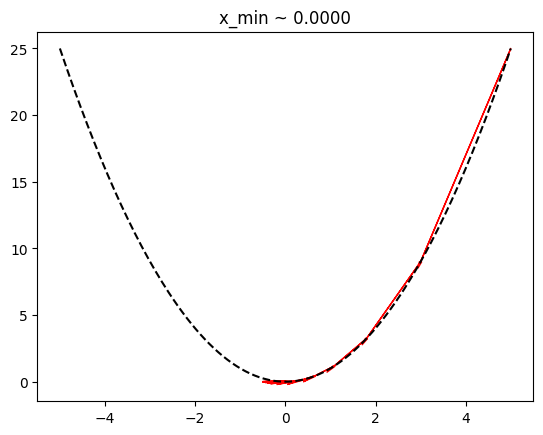

In [349]:
plt.plot(x, y, '--k', ms=10)
min_x = gradient_descent_runner_1d(initial_x, learning_rate, num_iterations)
plt.title(f"x_min ~ {min_x:.4f}")
plt.show()

# Zadanie
Wykonaj powyższe zadania dla 
  * learning_rate = 0.001
  * learning_rate = 0.1
  * learning_rate = 0.2
  * learning_rate = 0.5
  * learning_rate = 0.9
  * learning_rate = 0.99
  * learning_rate = 0.999

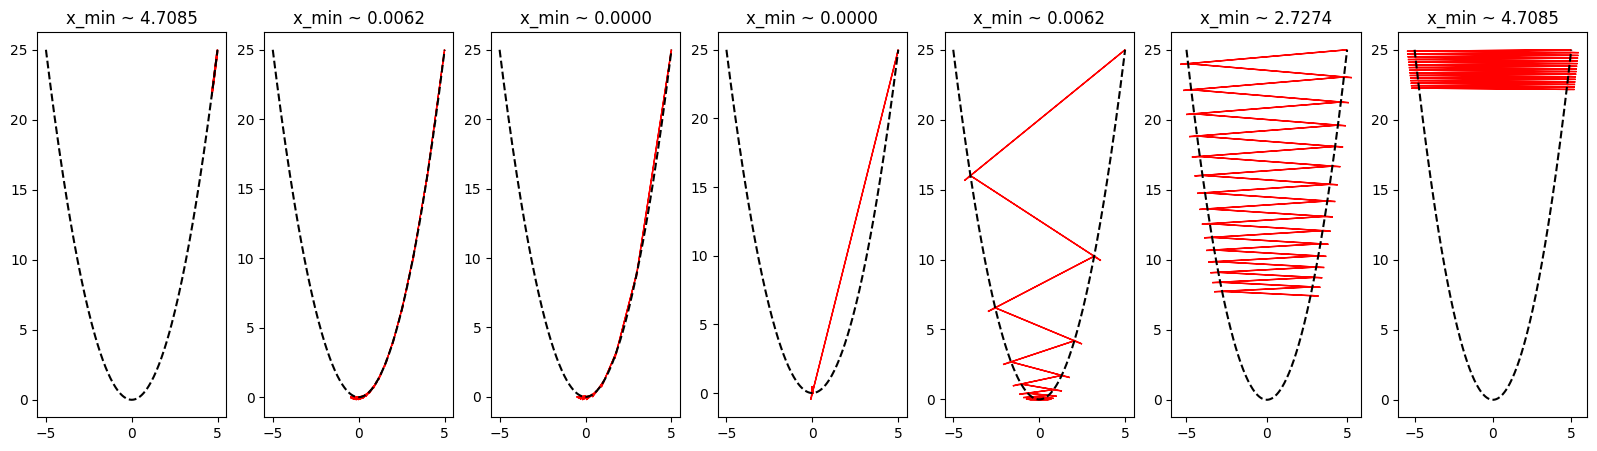

In [350]:
fig, axs = plt.subplots(1, 7, figsize=(20, 5))

for learning_rate, ax in zip([0.001, 0.1, 0.2, 0.5, 0.9, 0.99, 0.999], axs):
    min_x = gradient_descent_runner_1d(initial_x, learning_rate, num_iterations, ax=ax)
    ax.plot(x, y, '--k', ms=10)
    ax.set_title(f"x_min ~ {min_x:.4f}")

plt.show()

# Zadanie 2

Napisz (od podstaw) algorytm znajdowania minimum metodą gradientową.
Zaprezentuj jego działanie na przykładzie funkcji 

$$
f(x,y)=4*x^2-2x+y^2,
$$ 

startując z punktu $(x,y)=(2,2)$. Zilustruj całą sytuacje oznaczając na wykresie kilka pierwszych iteracji.
Wykonaj obrazek 3D.

In [351]:
def step_gradient_3d(x_current, y_current, learningRate, ax=plt):
    x_gradient = grad_x(x_current)
    y_gradient = grad_y(y_current)

    new_x = x_current - learningRate * x_gradient
    new_y = y_current - learningRate * y_gradient

    ax.quiver(x_current, y_current, (fun(x_current, y_current)),
              - (learningRate * x_gradient), - (learningRate * y_gradient),
              (-(fun(x_current, y_current) - fun(new_x, new_y))))

    return new_x, new_y


def gradient_descent_runner_3d(starting_x, starting_y, learning_rate, num_iterations, ax):
    x, y = starting_x, starting_y
    for i in range(num_iterations):
        x, y = step_gradient_3d(x, y, learning_rate, ax)
    return x, y

In [352]:
def draw_3d_plot():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                    linewidth=0.01, antialiased=True, alpha=0.3)
    x, y = gradient_descent_runner_3d(initial_x, initial_y, learning_rate, num_iterations, ax)
    plt.plot([initial_x], [initial_y], [fun(initial_x, initial_y)], "o")
    plt.title(f"x_min ~ ({x:.4f}, {y:.4f})")
    plt.show()

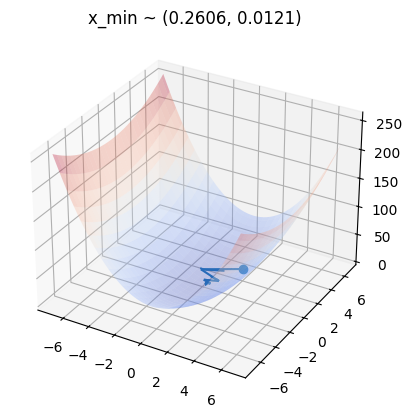

In [353]:
fun = lambda x, y: 4 * x ** 2 - 2 * x + y ** 2
grad_x = lambda x: 8 * x - 2
grad_y = lambda y: 2 * y

X = np.arange(-7, 7, 0.25)
Y = np.arange(-7, 7, 0.25)
X, Y = np.meshgrid(X, Y)
Z = fun(X, Y)

learning_rate = 0.2
initial_x = 2
initial_y = 2
num_iterations = 10

draw_3d_plot()

# Zadanie
Wykonaj analogiczne zadanie ale z:
  * initial_x = 5 
  * initial_y = 0 
  * num_iterations = 10

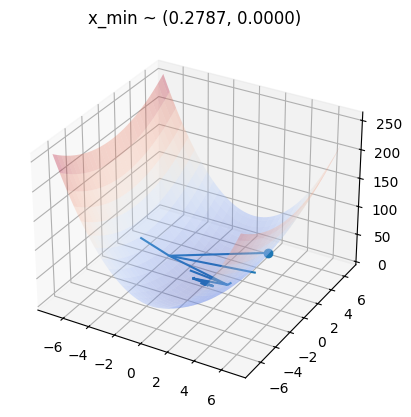

In [354]:
initial_x = 5
initial_y = 0
num_iterations = 10

draw_3d_plot()

# Zadanie
Wykonaj analogiczne zadanie ale z obrazkiem 2d

$$
f(x,y)=x^2-2x+y^2,
$$ 

oraz

$$
f(x,y)=4*x^2-2x+y^2,
$$ 


In [355]:
def step_gradient_2d(x_current, y_current, learningRate):
    x_gradient = grad_x(x_current)
    y_gradient = grad_y(y_current)

    new_x = x_current - (learningRate * x_gradient)
    new_y = y_current - (learningRate * y_gradient)

    plt.arrow(x_current, y_current, - (learningRate * x_gradient), - (learningRate * y_gradient), head_width=0.05,
              head_length=0.5, ec="red")

    return new_x, new_y


def gradient_descent_runner_2d(starting_x, starting_y, learning_rate, num_iterations):
    x, y = starting_x, starting_y
    for i in range(num_iterations):
        x, y = step_gradient_2d(x, y, learning_rate)
    return x, y

In [356]:
def plot_2d_plot():
    plt.figure()
    CS = plt.contour(X, Y, Z)

    plt.plot([initial_x], [initial_y], "o")
    x, y = gradient_descent_runner_2d(initial_x, initial_y, learning_rate, num_iterations)
    plt.title(f"x_min ~ ({x:.4f}, {y:.4f})")
    plt.axis('equal')
    plt.show()

In [357]:
chi2 = lambda x, y: x ** 2 - 2 * x + y ** 2
grad_x = lambda x: 2 * x - 2
grad_y = lambda y: 2 * y

x = np.arange(-10, 10, 0.02)
y = np.arange(-10, 10, 0.02)
X, Y = np.meshgrid(x, y)
Z = chi2(X, Y)

learning_rate = 0.3
initial_x = 5
initial_y = 5
num_iterations = 1000

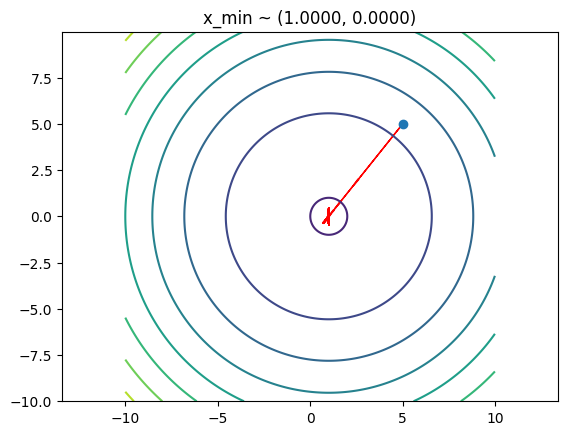

In [358]:
plot_2d_plot()

In [359]:
chi3 = lambda x, y: 4 * x ** 2 - 2 * x + y ** 2
grad_x = lambda x: 8 * x - 2
grad_y = lambda y: 2 * y

x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = chi3(X, Y)

initial_x = 5
initial_y = 5
learning_rate = 0.01
num_iterations = 100

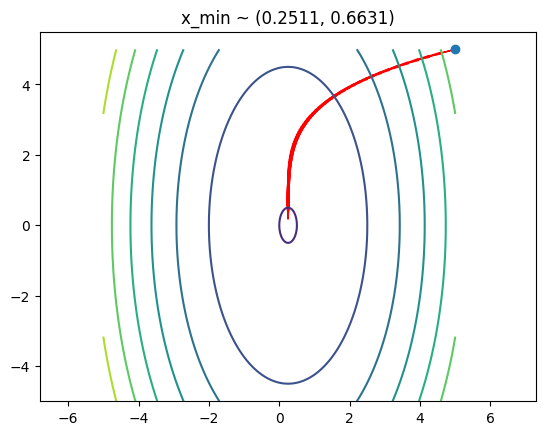

In [360]:
plot_2d_plot()

# Zadanie 3

Napisz (od podstaw) algorytm znajdowania minimum metodą gradientową.
Zaprezentuj jego działanie na przykładzie funkcji $f(x)=x^2-y^2$, startując z punktu $x=5$ oraz $x=1$. Zilustruj całą sytuacje oznaczając na wykresie 5 pierwszych iteracji.

Wykonaj rysunek:
  
  * 2D conture plot
  * 3D 
  
Co się stanie gdy zaczniemy z punktu $x=5$ oraz $x=0$? 

In [361]:
g = lambda x, y: x ** 2 - y ** 2
grad_x = lambda x: 2 * x
grad_y = lambda y: -2 * y

x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = g(X, Y)

initial_x = 5
initial_y = 1
learning_rate = 0.01
num_iterations = 89

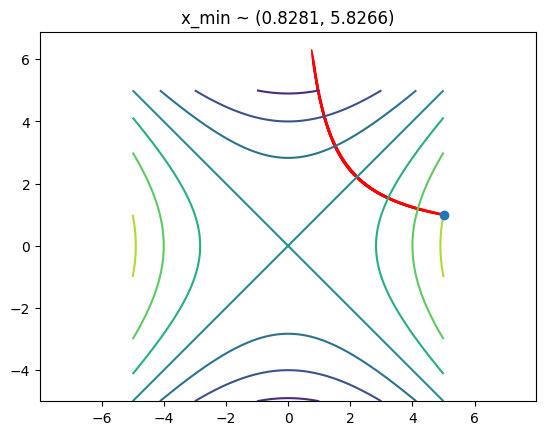

In [362]:
plot_2d_plot()

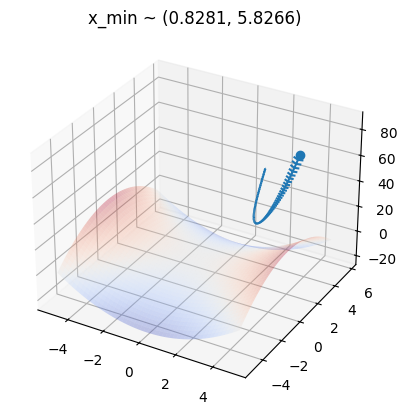

In [363]:
draw_3d_plot()

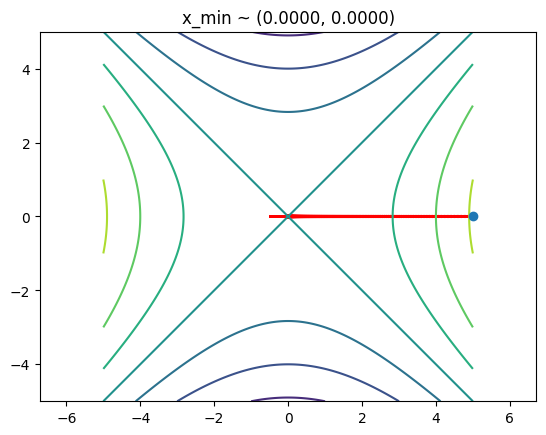

In [367]:
initial_x, initial_y = 5, 0
num_iterations = 1000
plot_2d_plot()

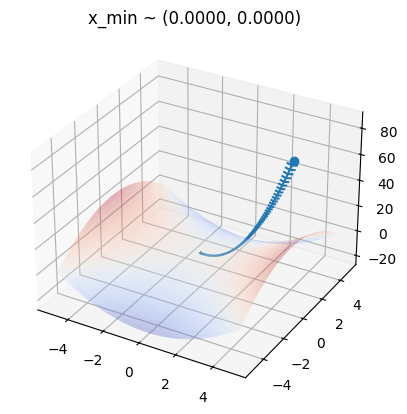

In [368]:
draw_3d_plot() 